In [1]:
import numpy as np

In [2]:
def softmax_function(z):
    #e_z = np.exp(z - np.max(z))  
    e_z = np.exp(z)
    return e_z / e_z.sum(axis=1, keepdims=True)


In [3]:
from sklearn.datasets import make_classification
import pandas as pd

# defining the number of samples, features and classes
n_samples = 1000
n_features = 2
n_classes = 4

# sklearn to generate a classification dataset

#informative -> features that are useful for the classification
#redundant -> features that are not adding new information but are derived from the informative features
#repeated -> duplicating informative or redundant features

#informative + redundant + repeated -> samples

#clusters_per_class -> 1 cluster in the group ->all data points within each class come from the same distribution.

# class_sep -> increase this parameter to increase class separation
X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=n_classes,
                           n_clusters_per_class=1,
                            class_sep=2, 
                           random_state=1)

# coverting it to a pandas df for better visualization and handling
df = pd.DataFrame(data=X, columns=['Feature1', 'Feature2'])
df['Target'] = y


print(df)


     Feature1  Feature2  Target
0    1.863411  0.087646       3
1   -1.530997  1.901182       2
2   -0.017224 -2.591112       0
3   -2.032039 -1.801162       0
4    4.620555  0.901124       3
..        ...       ...     ...
995  3.143260  3.223026       3
996  2.425043 -1.236500       1
997  2.330195  4.721810       3
998 -2.010841  1.426339       2
999 -2.008732  2.245402       2

[1000 rows x 3 columns]


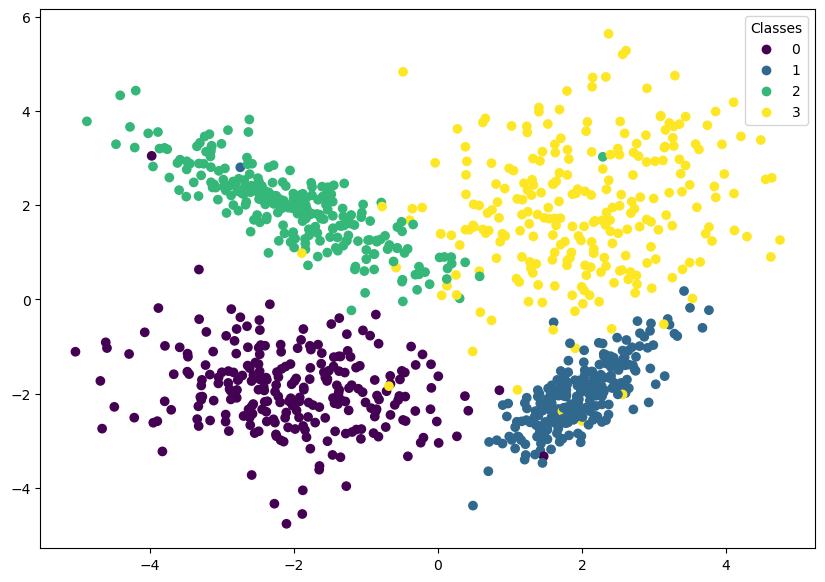

In [4]:
import matplotlib.pyplot as plt

# Separate features
feature1 = df['Feature1']
feature2 = df['Feature2']

# Create a scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(feature1, feature2, c=df['Target'], cmap='viridis')

# Create a legend
plt.legend(*scatter.legend_elements(), title='Classes')

# Show the plot
plt.show()


In [5]:
# exporting the DataFrame to a CSV file
df.to_csv('data/multi_class_generated.csv', index=False)


In [6]:
data = np.loadtxt("data/multi_class_generated.csv", delimiter=",", skiprows=1)
print(data.shape)

(1000, 3)


In [7]:
X_train = data[:,:2]
y_train = data[:,2]

print(f"Classes: {np.unique(y_train)}")

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")

Classes: [0. 1. 2. 3.]
Shape of X_train: (1000, 2), Shape of y_train: (1000,)


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import softmax, relu

#Apple Silicon: optimizers.legacy.Adam
#Base: optimizers.Adam
from tensorflow.keras.optimizers.legacy import Adam

In [9]:
# Set seed for reproducibility, ensuring "random" numbers are predictable
tf.random.set_seed(15)

model = Sequential(
    [ 
        # Input layer to specify expected shape of the input data, (2,) features in this case
        Input(shape=(2,)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax') 
    ]
)

model.summary()


model.compile(
    loss= SparseCategoricalCrossentropy(),
    optimizer= Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 0s 672us/step - loss: 1.4684
Epoch 2/200
32/32 [==============================] - 0s 568us/step - loss: 1.0820
Epoch 3/200
32/32 [==============================] - 0s 525us/step - loss: 0.8032
Epoch 4/200
32/32 [=========================

32/32 [==============================] - 0s 542us/step - loss: 0.1089
Epoch 90/200
32/32 [==============================] - 0s 487us/step - loss: 0.1086
Epoch 91/200
32/32 [==============================] - 0s 444us/step - loss: 0.1080
Epoch 92/200
32/32 [==============================] - 0s 458us/step - loss: 0.1077
Epoch 93/200
32/32 [==============================] - 0s 471us/step - loss: 0.1079
Epoch 94/200
32/32 [==============================] - 0s 448us/step - loss: 0.1082
Epoch 95/200
32/32 [==============================] - 0s 446us/step - loss: 0.1084
Epoch 96/200
32/32 [==============================] - 0s 434us/step - loss: 0.1081
Epoch 97/200
32/32 [==============================] - 0s 450us/step - loss: 0.1075
Epoch 98/200
32/32 [==============================] - 0s 463us/step - loss: 0.1070
Epoch 99/200
32/32 [==============================] - 0s 457us/step - loss: 0.1070
Epoch 100/200
32/32 [==============================] - 0s 450us/step - loss: 0.1081
Epoch 101/200
32

32/32 [==============================] - 0s 475us/step - loss: 0.0990
Epoch 187/200
32/32 [==============================] - 0s 477us/step - loss: 0.0997
Epoch 188/200
32/32 [==============================] - 0s 452us/step - loss: 0.1011
Epoch 189/200
32/32 [==============================] - 0s 469us/step - loss: 0.0983
Epoch 190/200
32/32 [==============================] - 0s 471us/step - loss: 0.1006
Epoch 191/200
32/32 [==============================] - 0s 452us/step - loss: 0.0985
Epoch 192/200
32/32 [==============================] - 0s 520us/step - loss: 0.0985
Epoch 193/200
32/32 [==============================] - 0s 501us/step - loss: 0.0985
Epoch 194/200
32/32 [==============================] - 0s 514us/step - loss: 0.0984
Epoch 195/200
32/32 [==============================] - 0s 506us/step - loss: 0.0983
Epoch 196/200
32/32 [==============================] - 0s 493us/step - loss: 0.0985
Epoch 197/200
32/32 [==============================] - 0s 499us/step - loss: 0.0982
Epoch 

In [10]:
probabilities = model.predict(X_train)
print(probabilities)
print("largest value", np.max(probabilities), "smallest value", np.min(probabilities))

32/32 [==============================] - 0s 384us/step
[[3.3776185e-05 5.5397884e-03 1.4190510e-03 9.9300730e-01]
 [7.7084103e-04 1.2369624e-03 9.8862153e-01 9.3705878e-03]
 [9.8841083e-01 6.1778650e-03 5.6339650e-07 5.4107886e-03]
 ...
 [6.3864815e-13 8.4460421e-09 1.6089246e-04 9.9983907e-01]
 [8.0492459e-03 4.5873802e-03 9.8343140e-01 3.9319494e-03]
 [1.4064468e-03 2.5656070e-03 9.9096137e-01 5.0665145e-03]]
largest value 0.99999976 smallest value 1.7722084e-14


In [11]:
#preffered model to reduce numerical roundoff errors

model_2 = Sequential(
    [ 
        Input(shape=(2,)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear'), #since from_logits = True
    ]
)

model_2.summary()

model_2.compile(
    loss= SparseCategoricalCrossentropy(from_logits=True), 
    optimizer= Adam(0.001),
)

model_2.fit(
    X_train,y_train,
    epochs=200
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                75        
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 4)                 64        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 0s 562us/step - loss: 1.0394
Epoch 2/200
32/32 [==============================] - 0s 562us/step - loss: 0.7118
Epoch 3/200
32/32 [==============================] - 0s 515us/step - loss: 0.4760
Epoch 4/200
32/32 [=======================

32/32 [==============================] - 0s 505us/step - loss: 0.1063
Epoch 90/200
32/32 [==============================] - 0s 511us/step - loss: 0.1062
Epoch 91/200
32/32 [==============================] - 0s 453us/step - loss: 0.1059
Epoch 92/200
32/32 [==============================] - 0s 451us/step - loss: 0.1050
Epoch 93/200
32/32 [==============================] - 0s 458us/step - loss: 0.1060
Epoch 94/200
32/32 [==============================] - 0s 473us/step - loss: 0.1055
Epoch 95/200
32/32 [==============================] - 0s 454us/step - loss: 0.1057
Epoch 96/200
32/32 [==============================] - 0s 486us/step - loss: 0.1053
Epoch 97/200
32/32 [==============================] - 0s 526us/step - loss: 0.1051
Epoch 98/200
32/32 [==============================] - 0s 475us/step - loss: 0.1048
Epoch 99/200
32/32 [==============================] - 0s 489us/step - loss: 0.1048
Epoch 100/200
32/32 [==============================] - 0s 469us/step - loss: 0.1055
Epoch 101/200
32

32/32 [==============================] - 0s 468us/step - loss: 0.0992
Epoch 187/200
32/32 [==============================] - 0s 446us/step - loss: 0.0994
Epoch 188/200
32/32 [==============================] - 0s 437us/step - loss: 0.1009
Epoch 189/200
32/32 [==============================] - 0s 426us/step - loss: 0.0984
Epoch 190/200
32/32 [==============================] - 0s 428us/step - loss: 0.1001
Epoch 191/200
32/32 [==============================] - 0s 435us/step - loss: 0.0983
Epoch 192/200
32/32 [==============================] - 0s 429us/step - loss: 0.0989
Epoch 193/200
32/32 [==============================] - 0s 421us/step - loss: 0.0987
Epoch 194/200
32/32 [==============================] - 0s 448us/step - loss: 0.0989
Epoch 195/200
32/32 [==============================] - 0s 447us/step - loss: 0.0991
Epoch 196/200
32/32 [==============================] - 0s 450us/step - loss: 0.0986
Epoch 197/200
32/32 [==============================] - 0s 418us/step - loss: 0.0986
Epoch 

In [12]:
logits_model2 = model_2.predict(X_train)
print(logits_model2)
print("largest value", np.max(logits_model2), "smallest value", np.min(logits_model2))

32/32 [==============================] - 0s 425us/step
[[ -3.6208549    1.4360437   -0.9297981    5.6435504 ]
 [ -3.58251     -2.3022425    5.0477896    0.01600096]
 [  6.746115     1.6157236   -6.7764015    1.6284504 ]
 ...
 [-12.075151    -2.3046486    4.25422     13.069923  ]
 [ -1.5003805   -2.7071424    4.0692973   -1.3159182 ]
 [ -3.2276022   -1.8583562    4.740236    -0.81545556]]
largest value 14.624511 smallest value -13.635805


In [13]:
model2_probabilities = tf.nn.softmax(logits_model2).numpy()
model2_softmax_custom = softmax_function(logits_model2)


print("Unrecommended:\n",probabilities)
print("model2_probabilities:\n",model2_probabilities)
print("model2_softmax_custom:\n",model2_softmax_custom)

Unrecommended:
 [[3.3776185e-05 5.5397884e-03 1.4190510e-03 9.9300730e-01]
 [7.7084103e-04 1.2369624e-03 9.8862153e-01 9.3705878e-03]
 [9.8841083e-01 6.1778650e-03 5.6339650e-07 5.4107886e-03]
 ...
 [6.3864815e-13 8.4460421e-09 1.6089246e-04 9.9983907e-01]
 [8.0492459e-03 4.5873802e-03 9.8343140e-01 3.9319494e-03]
 [1.4064468e-03 2.5656070e-03 9.9096137e-01 5.0665145e-03]]
model2_probabilities:
 [[9.3210707e-05 1.4643637e-02 1.3746017e-03 9.8388851e-01]
 [1.7730822e-04 6.3788448e-04 9.9270529e-01 6.4795110e-03]
 [9.8823452e-01 5.8446601e-03 1.3246644e-06 5.9195193e-03]
 ...
 [1.2010696e-11 2.1030216e-07 1.4836248e-04 9.9985135e-01]
 [3.7757037e-03 1.1295563e-03 9.9055415e-01 4.5405529e-03]
 [3.4450673e-04 1.3547336e-03 9.9445677e-01 3.8439690e-03]]
model2_softmax_custom:
 [[9.32107068e-05 1.46436365e-02 1.37460185e-03 9.83888566e-01]
 [1.77308233e-04 6.37884426e-04 9.92705286e-01 6.47951243e-03]
 [9.88234460e-01 5.84465964e-03 1.32466357e-06 5.91951888e-03]
 ...
 [1.20106980e-11 2.1030

In [14]:
#predicting categories for first 5 rows #SOFT-max not required
print("Original:")
print(y_train[:5])

print("\nUnrecommended:")
for i in range(5):
    print( f"{probabilities[i]}, class: {np.argmax(probabilities[i])}")
print("\nmodel2_logits:")
for i in range(5):
    print( f"{logits_model2[i]}, class: {np.argmax(logits_model2[i])}")
print("\nmodel2_probabilities:")
for i in range(5):
    print( f"{model2_probabilities[i]}, class: {np.argmax(model2_probabilities[i])}")
print("\nmodel2_softmax_custom:")
for i in range(5):
    print( f"{model2_softmax_custom[i]}, class: {np.argmax(model2_softmax_custom[i])}")

Original:
[3. 2. 0. 0. 3.]

Unrecommended:
[3.3776185e-05 5.5397884e-03 1.4190510e-03 9.9300730e-01], class: 3
[7.7084103e-04 1.2369624e-03 9.8862153e-01 9.3705878e-03], class: 2
[9.8841083e-01 6.1778650e-03 5.6339650e-07 5.4107886e-03], class: 0
[9.9968684e-01 4.5614564e-05 3.0989545e-06 2.6441526e-04], class: 0
[2.0109384e-08 5.0189734e-02 4.2041543e-06 9.4980603e-01], class: 3

model2_logits:
[-3.6208549  1.4360437 -0.9297981  5.6435504], class: 3
[-3.58251    -2.3022425   5.0477896   0.01600096], class: 2
[ 6.746115   1.6157236 -6.7764015  1.6284504], class: 0
[ 7.98669    -3.3828454  -4.4132795   0.43864876], class: 0
[-7.839847   6.605944  -3.5777218 10.068061 ], class: 3

model2_probabilities:
[9.3210707e-05 1.4643637e-02 1.3746017e-03 9.8388851e-01], class: 3
[1.7730822e-04 6.3788448e-04 9.9270529e-01 6.4795110e-03], class: 2
[9.8823452e-01 5.8446601e-03 1.3246644e-06 5.9195193e-03], class: 0
[9.9945742e-01 1.1535536e-05 4.1164813e-06 5.2685558e-04], class: 0
[1.6191326e-08 3.0

In [ ]:
def plot_decision_boundary(X, model,title):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Use the model to predict the class for each point
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)  # get the class with highest probability
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y_train, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()


In [ ]:
#plotting decision boundary for model and model_2
plot_decision_boundary(X_train, model_2,"model2 DecisionBoundary")
plot_decision_boundary(X_train, model, "model DecisionBoundary")

In [ ]:
#model with less neurons

#preffered model to reduce numerical roundoff errors

model_3 = Sequential(
    [ 
        Input(shape=(2,)),
        Dense(2, activation = 'relu',name='L1'),
        Dense(4, activation = 'linear',name='L2'), #since from_logits = True
    ]
)

model_3.summary()

model_3.compile(
    loss= SparseCategoricalCrossentropy(from_logits=True), 
    optimizer= Adam(0.001),
)

model_3.fit(
    X_train,y_train,
    epochs=100
)

In [ ]:
#plotting decision boundary for model_3
plot_decision_boundary(X_train, model_3,"model3 DecisionBoundary")